<a href="https://colab.research.google.com/github/bharatyadav6622-arch/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: Customer Churn Prediction for Telecom Retention

Goal: Identify high-risk customers using Logistic Regression and Random Forest to reduce churn.

Logistic Regression Accuracy: 0.79
Random Forest Accuracy: 0.79


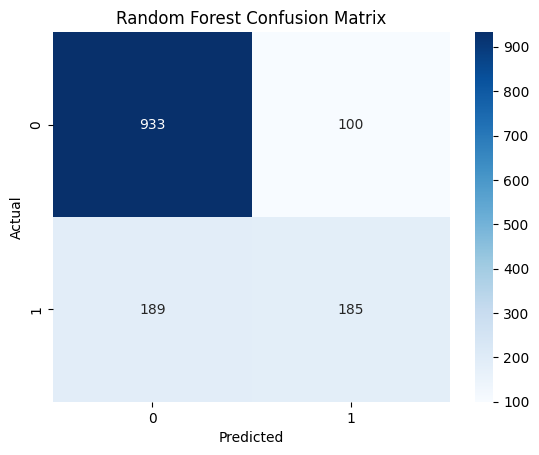

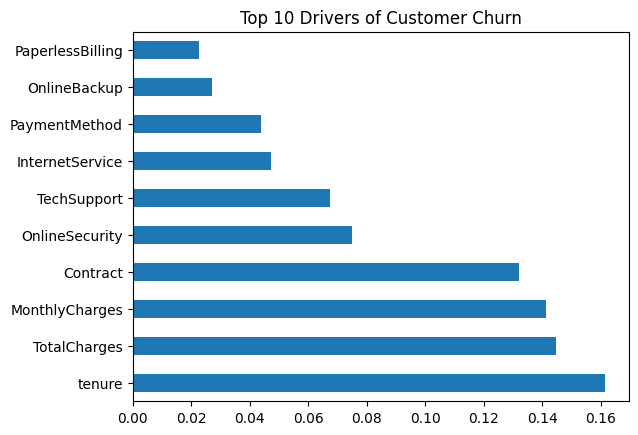

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the data (Replace with your path or use the Kaggle URL)
df = pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')

# 1. Clean Data: TotalCharges is often read as an object/string
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True) # Drop rows with nulls (usually new customers with 0 charges)

# 2. Feature Engineering: Convert 'Yes/No' to 1/0
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' and col != 'customerID':
        df[col] = le.fit_transform(df[col])

# 3. Define Features (X) and Target (y)
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Scaling is CRUCIAL for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

lr_preds = lr_model.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_preds):.2f}")

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train) # RF doesn't strictly require scaling

rf_preds = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_preds):.2f}")

from sklearn.metrics import confusion_matrix

# 1. Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Feature Importance - This is your "Business Insight"
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Drivers of Customer Churn')
plt.show()